In [226]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor 
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier


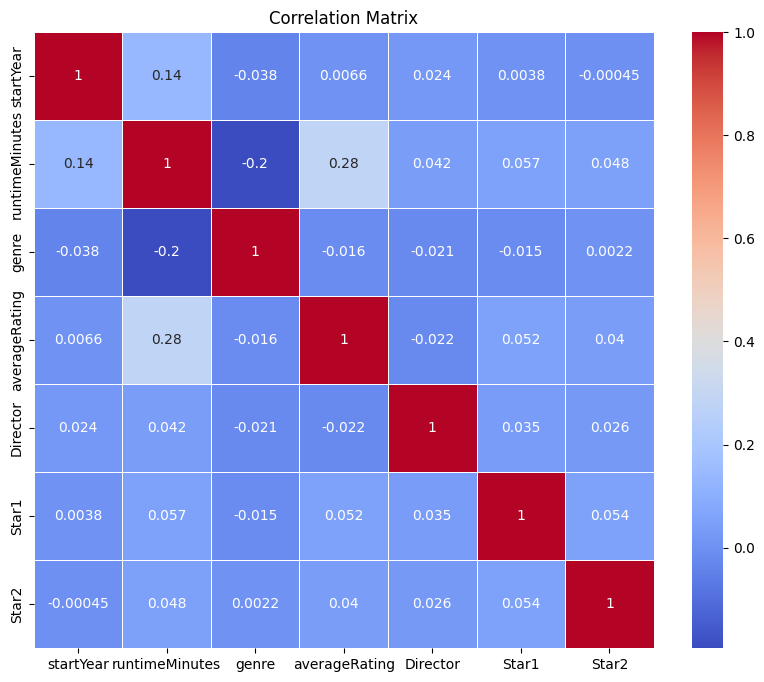

In [227]:
data2 = pd.read_csv("used_data/Last5Years.csv")
data2 = data2.drop(labels = ['titleType', 'tconst', 'primaryTitle', 'originalTitle', 'isAdult'], axis = 1)
le = LabelEncoder()
data2['Director'] = le.fit_transform(data2['Director'])
data2['Star1'] = le.fit_transform(data2['Star1'])
data2['Star2'] = le.fit_transform(data2['Star2'])
data2['genre'] = le.fit_transform(data2['genre'])


correlation_matrix = data2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [228]:
data = pd.read_csv("used_data/FIVE.csv")
le = LabelEncoder()
data['Director'] = le.fit_transform(data['Director'])
data['Star1'] = le.fit_transform(data['Star1'])
data['Star2'] = le.fit_transform(data['Star2'])
data['genre'] = le.fit_transform(data['genre'])
#data['originalTitle'] = le.fit_transform(data['originalTitle'])
data['primaryTitle'] = le.fit_transform(data['primaryTitle'])
data = data.drop(labels = ['titleType', 'tconst', 'originalTitle', 'primaryTitle'], axis = 1)
#data = data.drop(labels = ['tconst'], axis = 1)

data2 = pd.read_csv("used_data/Last5Years.csv")
data2.round(0)
le = LabelEncoder()
data2['Director'] = le.fit_transform(data2['Director'])
data2['Star1'] = le.fit_transform(data2['Star1'])
data2['Star2'] = le.fit_transform(data2['Star2'])
data2['genre'] = le.fit_transform(data2['genre'])
data2['primaryTitle'] = le.fit_transform(data2['primaryTitle'])
data2['originalTitle'] = le.fit_transform(data2['originalTitle'])

data2['averageRating'] = data2['averageRating'].astype(int)

data2 = data2.drop(labels = ['titleType', 'tconst', 'primaryTitle', 'originalTitle'], axis = 1)
data2.head()

,isAdult,startYear,runtimeMinutes,genre,averageRating,Director,Star1,Star2
0,0,2019,107,3,7,566,282,519
1,0,2022,121,11,5,309,822,552
2,0,2021,148,0,5,1377,244,372
3,0,2023,118,9,6,91,217,30
4,0,2019,90,11,5,667,300,643


In [229]:
y = data2["averageRating"]
x = data2.drop(["averageRating"], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=616)

Mean Squared Error: 2.791176470588235
R-squared: -1.28118548683578


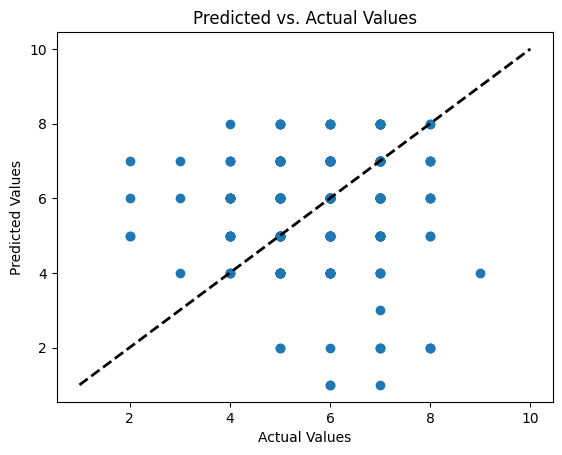

Accuracy: 0.27941176470588236


In [352]:
rf_Model = DecisionTreeClassifier(splitter="best")
rf_Model.fit(X_train,Y_train)

# Making predictions on the same data or new data
predictions = rf_Model.predict(X_test)
 
# Evaluating the model
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(Y_test, predictions)
print(f'R-squared: {r2}')
   
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot([1, 10], [1, 10], 'k--', lw=2)  # 45-degree line
plt.show()

print("Accuracy:",metrics.accuracy_score(Y_test, predictions))



In [353]:
rf_Model = RandomForestClassifier(n_estimators=7000, oob_score=True, class_weight = {1: 1, 2:1.5, 3:12, 4:2, 5:2, 6:2, 7:1})
rf_Model.fit(X_train,Y_train)


oob_score = rf_Model.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = rf_Model.predict(X_test)
 
# Evaluating the model
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(Y_test, predictions)
print(f'R-squared: {r2}')
   
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot([1, 10], [1, 10], 'k--', lw=2)  # 45-degree line
plt.show()
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))


Out-of-Bag Score: 0.42720588235294116
Mean Squared Error: 1.4529411764705882
R-squared: -0.18746641780492657


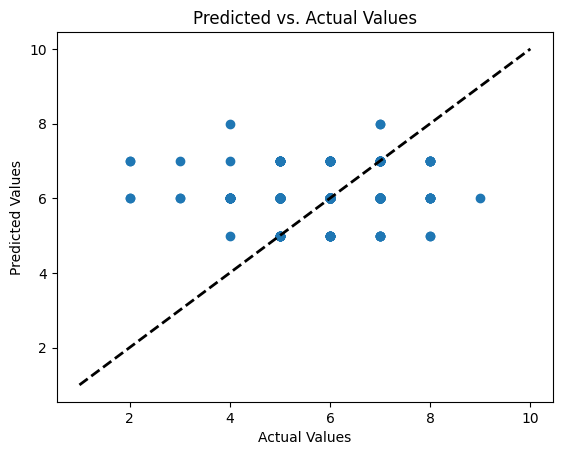

Accuracy: 0.3764705882352941


In [232]:
rf_Model = ExtraTreesClassifier(n_estimators=7000, bootstrap=True, oob_score=True)
rf_Model.fit(X_train,Y_train)


oob_score = rf_Model.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = rf_Model.predict(X_test)
 
# Evaluating the model
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(Y_test, predictions)
print(f'R-squared: {r2}')
   
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot([1, 10], [1, 10], 'k--', lw=2)  # 45-degree line
plt.show()
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))

In [114]:
y = data["averageRating"]
x = data.drop(["averageRating"], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=101)

Out-of-Bag Score: 0.12634282704337896
Mean Squared Error: 1.0497893053071894
R-squared: 0.14202338951449955


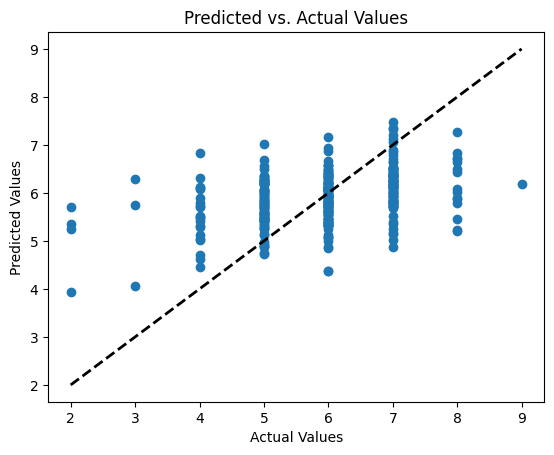

In [252]:
rf_Model = RandomForestRegressor(n_estimators=7500, oob_score=True)
rf_Model.fit(X_train,Y_train)


oob_score = rf_Model.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = rf_Model.predict(X_test)
 
# Evaluating the model
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(Y_test, predictions)
print(f'R-squared: {r2}')
   
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # 45-degree line
plt.show()

In [246]:
adb = AdaBoostRegressor() 
adb_model = adb.fit(X_train,Y_train)

print("The accuracy of the model on validation set is", adb_model.score(X_test,Y_test))


The accuracy of the model on validation set is 0.07617907111803845
